[*********************100%***********************]  1 of 1 completed

Loading data...


Start: 2023-05-04 00:00:00
End: 2024-09-26 00:00:00
Duration: 511 days 00:00:00
Exposure Time [%]: 100.0
Equity Initial [$]: 10000
Equity Final [$]: 11161.14
Equity Peak [$]: 12531.98
Return [%]: 11.61
Return (Ann.) [%]: 8.18
Volatility (Ann.) [%]: 12.31
Sharpe Ratio: 0.66
Sortino Ratio: 0.7
Max. Drawdown [%]: -10.94
Calmar Ratio: 0.75
Avg. Drawdown [%]: -3.22
Max. Drawdown Duration: 100 days 00:00:00
Avg. Drawdown Duration: 21 days 09:08:34.285714285
# Trades: 352
Best Day [%]: 2.91
Worst Day [%]: -2.31
Avg. Trade [%]: 0.03
Max. Trade Duration: 511
strategy: nearest_neighbors_regression


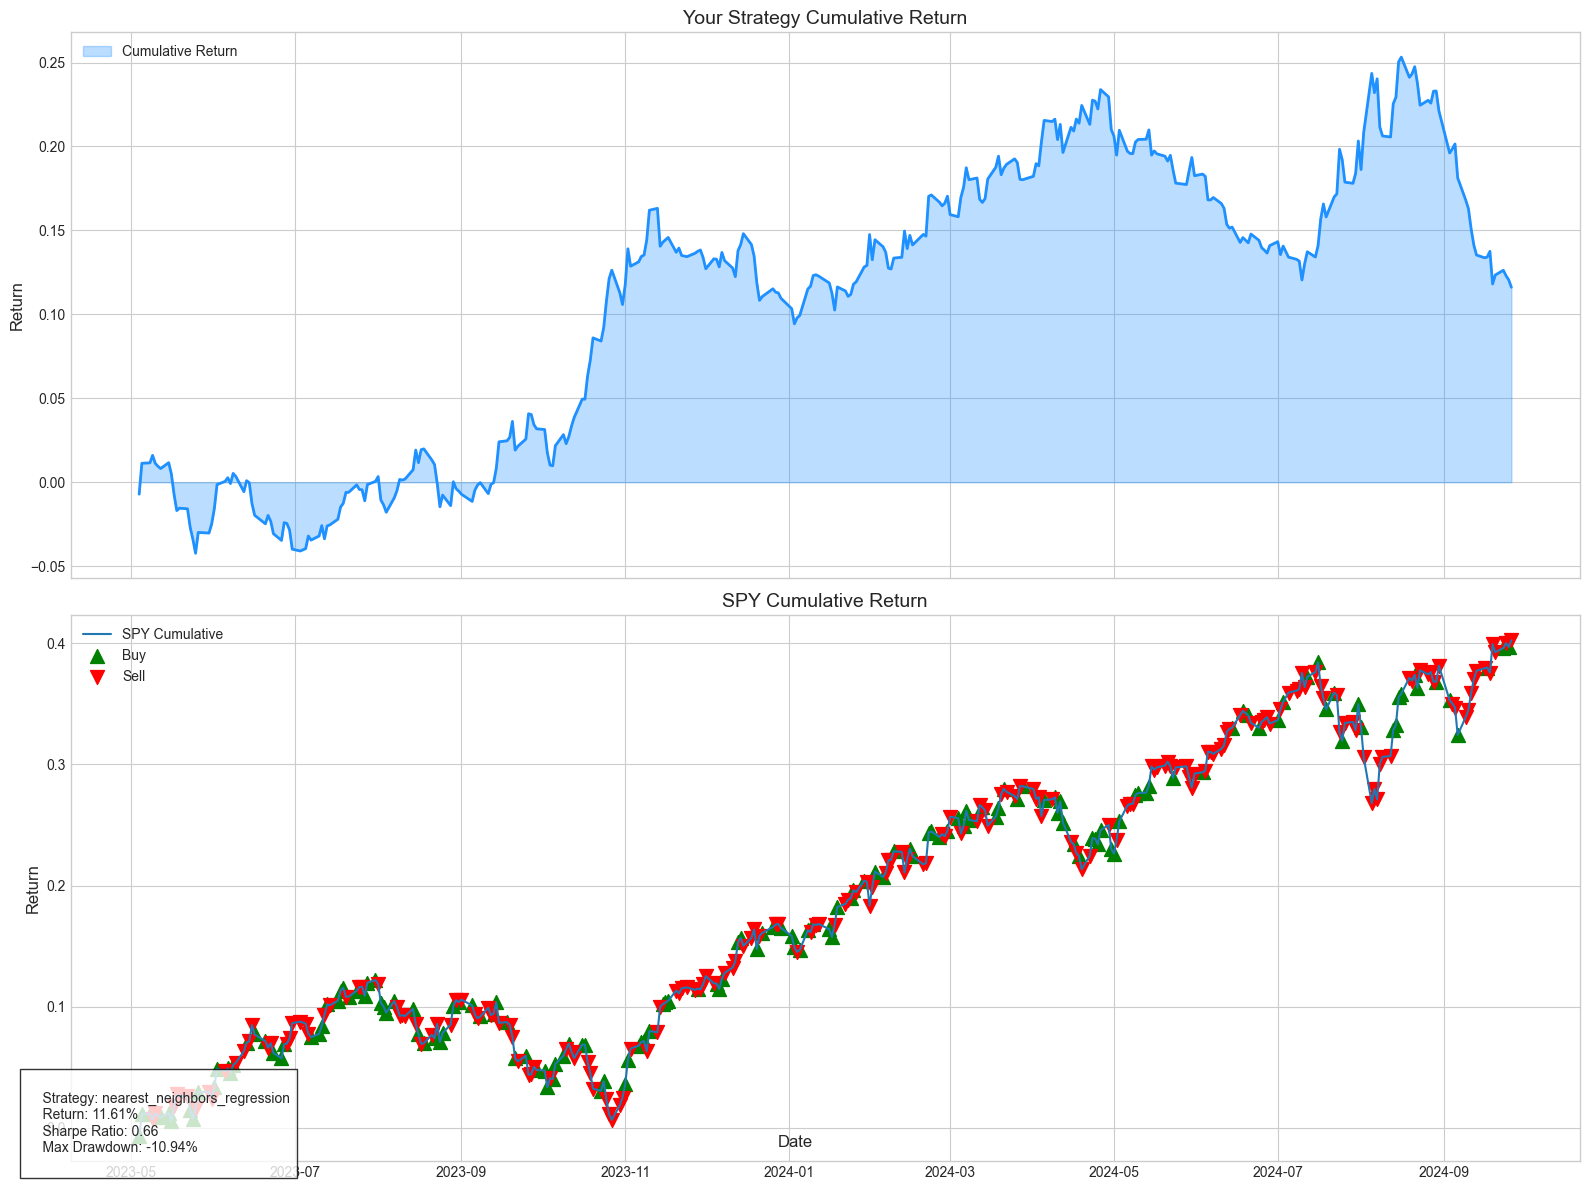

In [2]:
import tr4der

query = "I want to use a KNN model to trade SPY for the past 3 years"

tr = tr4der.Tr4der()

tr.set_api_key("YOUR_OPENAI_API_KEY")

tr.query(query)